## Model Evaluating

In [11]:
# Importing libraries
import tensorflow as tf
from src.features.functions import creating_generators, plotting_images, plotting_confusion_matrix, single_image_prediction
from src.features.constants import batch_size, train_dataset, test_dataset, val_dataset, model_saving
from IPython.display import display
from PIL import Image
import numpy as np

In [3]:
# Loading model
glasses_recognition = tf.keras.models.load_model(model_saving)

In [4]:
glasses_recognition.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 32)        4640  

In [5]:
def model_evaluating(model):
    train_generator, val_generator, test_generator = creating_generators(batch_size, train_dataset, test_dataset, val_dataset)
    print("Evaluating model on validation set:")
    model.evaluate(val_generator)
    print("Evaluating model on test set : ")
    model.evaluate(test_generator)
    return val_generator, test_generator

In [7]:
# Evaluating model on test and validation datasets
val_generator, test_generator = model_evaluating(glasses_recognition)

Found 1582 images belonging to 9 classes.
Found 527 images belonging to 9 classes.
Found 532 images belonging to 9 classes.
Evaluating model on train set:
198/198 [==============================] - 16s 79ms/step - loss: 0.0513 - accuracy: 0.9791
Evaluating model on validation set:
66/66 [==============================] - 2s 28ms/step - loss: 0.1250 - accuracy: 0.9677
Evaluating model on test set : 
67/67 [==============================] - 2s 30ms/step - loss: 0.1584 - accuracy: 0.9624


### Image Batch Prediction

In [42]:
test_generator.class_indices

{'CHAMPAGNE FLUTE': 0,
 'HIGHBALL GLASS': 1,
 'HURRICANE GLASS': 2,
 'MARGARITA GLASS': 3,
 'MARTINI GLASS': 4,
 'OLD FASHIONED GLASS': 5,
 'SNIFTER GLASS': 6,
 'STEAMLESS WINE GLASS': 7,
 'WINE GLASS': 8}

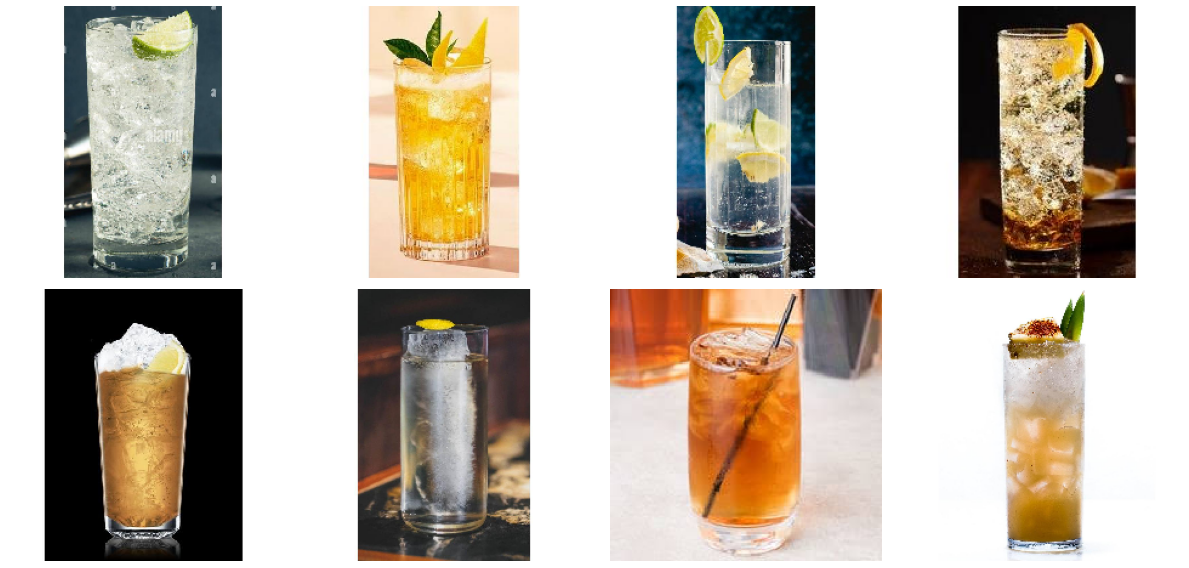

True Glass type: 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
test_images, test_labels = next(test_generator)
plotting_images(test_images)
print('True Glass type: \n', test_labels)

In [36]:
predict_results = glasses_recognition.predict(x=test_images, verbose=0)
results = np.round(predict_results)
print('Predicted Glass type: \n', results)

Predicted Glass type: 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]


### Single Image Prediction

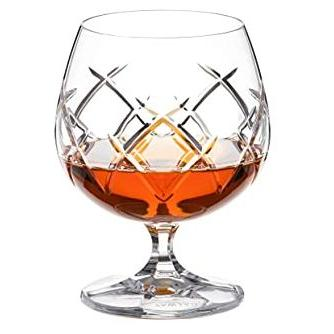

In [37]:
image_path = "C:\\Datasets and Projects\\GLASSES RECOGNITION\\data(images)\\dataset(processed)\\test\\SNIFTER GLASS\\5.jpg"
display(Image.open(image_path))

In [41]:
prediction_image = single_image_prediction(glasses_recognition, image_path)
print(f"Glass Type: {prediction_image}")

Glass Type: 6


### Confusion matrix for Model Results

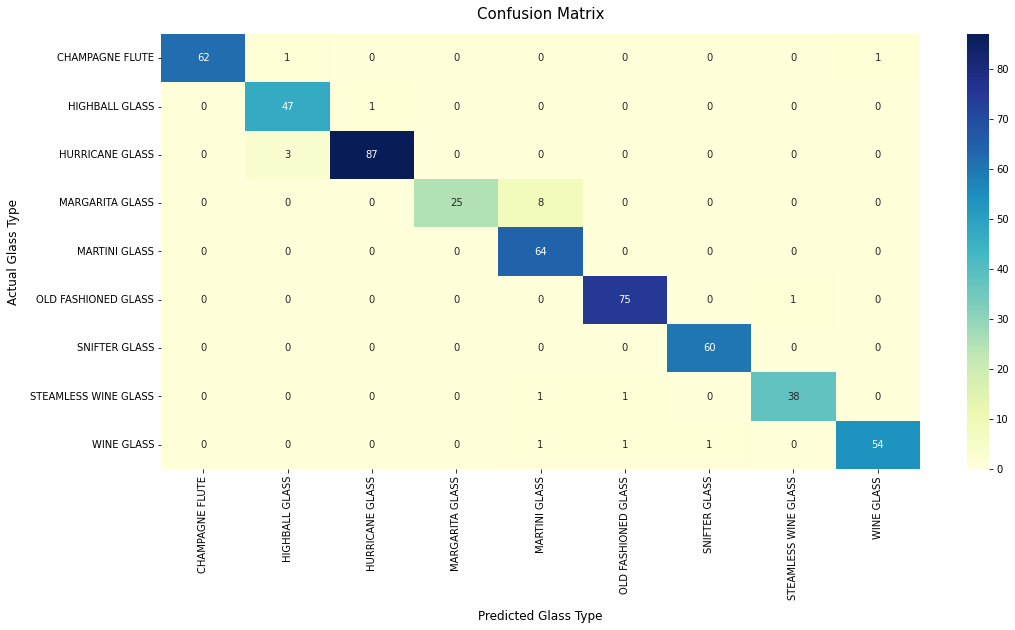

In [39]:
predict_results = glasses_recognition.predict(x=test_generator, verbose=0)
predict_results = predict_results.argmax(axis=1)
test_labels_names = test_generator.classes
plotting_confusion_matrix(test_labels_names, predict_results)